In [285]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats    
import math
from sklearn.decomposition import PCA
from scipy.interpolate import Rbf
import scipy.cluster.hierarchy as shc
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [250]:
'''Log10 of confirmed cases 13 Western Countries'''
confirmed=pd.read_csv("./time_series_covid_19_confirmed.csv")
ll=confirmed[["Country/Region", "Lat", "Long"]].groupby("Country/Region").mean().drop("China")
confirmed=confirmed.drop(["Lat", "Long", "Province/State"], axis=1).groupby("Country/Region").sum().drop("China")
confirmed=np.log10(confirmed+1)
confirmed=pd.concat([confirmed, ll], axis=1)
confirmed_13=confirmed.sort_values("3/20/20", ascending=False).iloc[0:15, :].drop(["Korea, South", "Iran"])
retain=[confirmed_13.index[i] for i in range(len(confirmed_13.index))]
retain[3]="North America"
retain

['Italy',
 'Spain',
 'Germany',
 'North America',
 'France',
 'Switzerland',
 'United Kingdom',
 'Netherlands',
 'Austria',
 'Belgium',
 'Norway',
 'Sweden',
 'Denmark']

In [257]:
'''2013 beds per thousand people'''
bed_people = pd.read_csv("./API_SH.MED.BEDS.ZS_DS2_en_csv_v2_821439.csv", header = 2, na_values="")

bed_people=bed_people.set_index("Country Name")
bed_people=pd.DataFrame(bed_people.loc[retain,"2009"].values, index=confirmed_13.index, columns=["beds_per_thds"])
#confirmed_13_extra longitude, latitude, beds per 1000 people.
confirmed_13_extra=pd.concat([confirmed_13[["Lat", "Long"]], bed_people], axis=1)
#Time series
confirmed_13=confirmed_13.drop(["Lat", "Long"], axis=1)


In [51]:
def pre_process0(data):
    
    ll=data[["Country/Region", "Lat", "Long"]].groupby("Country/Region").mean().drop("China")
    data=data.drop(["Lat", "Long", "Province/State"], axis=1).groupby("Country/Region").sum().drop("China")
    data=np.log10(data+1)
    data=pd.concat([data, ll], axis=1)
    return data

In [261]:
deaths=pd.read_csv("./time_series_covid_19_deaths.csv")
recovered=pd.read_csv("./time_series_covid_19_recovered.csv")

deaths=pre_process0(deaths)
recovered= pre_process0(recovered)
deaths=deaths.loc[confirmed_13.index, :].drop(["Lat", "Long"], axis=1)
recovered=recovered.loc[confirmed_13.index, :].drop(["Lat", "Long"], axis=1)
recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.019532,3.019532,3.158362,3.293804,3.368473,3.439333,3.468643,3.604874,3.647481,3.647481
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.264818,2.264818,2.287802,2.714330,2.714330,2.725095,3.012415,3.034227,3.044540,3.201124
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.414973,1.414973,1.672098,1.672098,1.672098,1.832509,1.832509,2.025306,2.056905,2.257679
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.954243,1.113943,1.113943,1.113943,1.113943,1.255273,1.255273,0.000000,0.000000,0.000000
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.113943,1.113943,1.113943,1.113943,1.113943,1.113943,1.113943,1.113943,1.113943,1.113943
Switzerland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.698970,0.698970,0.698970,0.698970,0.698970,0.698970,0.698970,1.204120,1.204120,1.204120
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.301030,1.301030,1.301030,1.301030,1.301030,1.342423,1.732394,1.832509,1.832509,1.832509
Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.477121,0.477121,0.477121,0.477121,0.477121,0.477121,0.477121
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.698970,0.698970,0.845098,0.845098,0.845098,0.845098,0.301030,1.000000,1.000000,1.000000


### Part I. Cluster the time series.

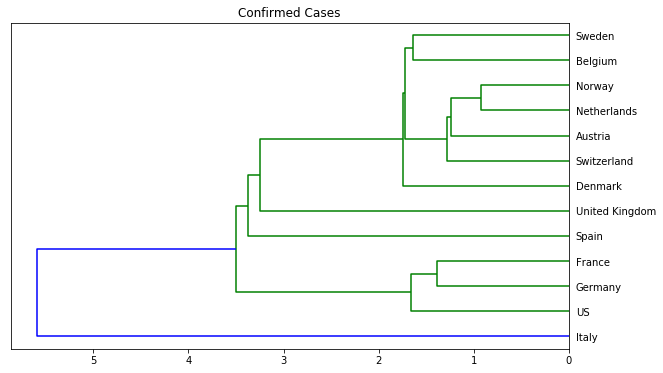

In [362]:
plt.figure(figsize=(10, 6))
plt.title("Confirmed Cases")

dend = shc.dendrogram(shc.linkage(confirmed_13),labels=confirmed_13.index, orientation=u'left')

ax = plt.gca()

ax.tick_params(axis='y', which='major', labelsize=10)
plt.savefig("confirmed_cases_13_single_cluster")

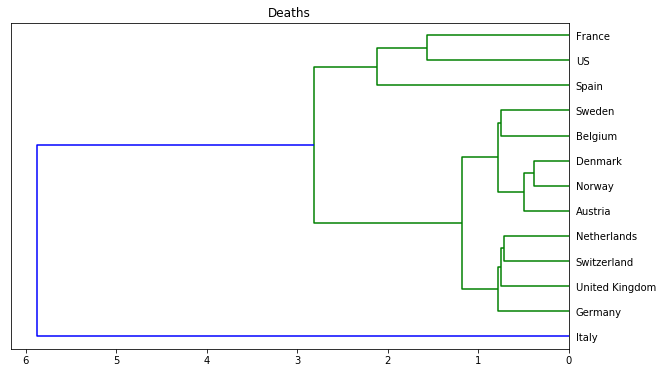

In [363]:
plt.figure(figsize=(10, 6))
plt.title("Deaths")

dend = shc.dendrogram(shc.linkage(deaths),labels=deaths.index, orientation=u'left')



ax = plt.gca()
#ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=10)
plt.savefig("Deaths_13_single_cluster")

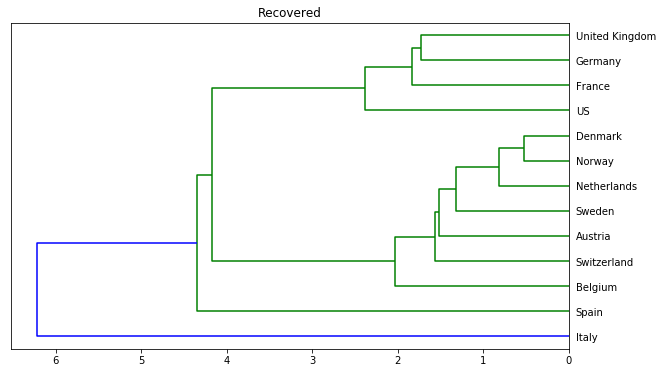

In [364]:
plt.figure(figsize=(10, 6))
plt.title("Recovered")

dend = shc.dendrogram(shc.linkage(recovered),labels=recovered.index, orientation=u'left')
ax = plt.gca()

ax.tick_params(axis='y', which='major', labelsize=10)
plt.savefig("recovered_13_single_cluster")

### Part II. The relationship between the beds per 1000 people and deaths or recovered people

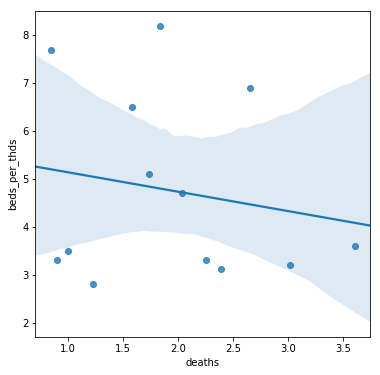

In [365]:
confirmed_13_20th=pd.DataFrame(pd.concat([recovered["3/20/20"] ,deaths["3/20/20"], confirmed_13_extra], axis=1).values, index=confirmed_13.index, columns=["recovered", "deaths", "Lat", "Long", "beds_per_thds"])
#sns.pairplot(confirmed_13_20th.drop(["Lat", "Long"], axis=1))
plt.figure(figsize=(6, 6))
sns.regplot(x="deaths", y="beds_per_thds", data=confirmed_13_20th.drop(["Lat", "Long"], axis=1))
plt.savefig("beds_per_1000_deaths")



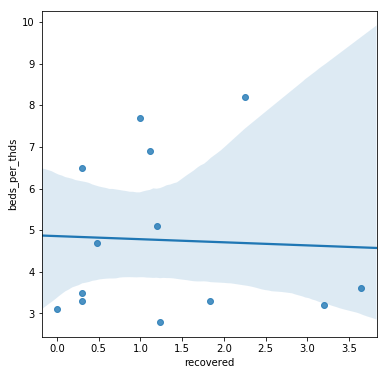

In [366]:
plt.figure(figsize=(6, 6))
sns.regplot(x="recovered", y="beds_per_thds", data=confirmed_13_20th.drop(["Lat", "Long"], axis=1))
plt.savefig("beds_per_1000_recovered")

### Maybe, we need to wait until the epidemy ends, so that there is a sense to compare the death and the beds per 1000 people.

## Part III. PCA of time series and countries of confirmed cases

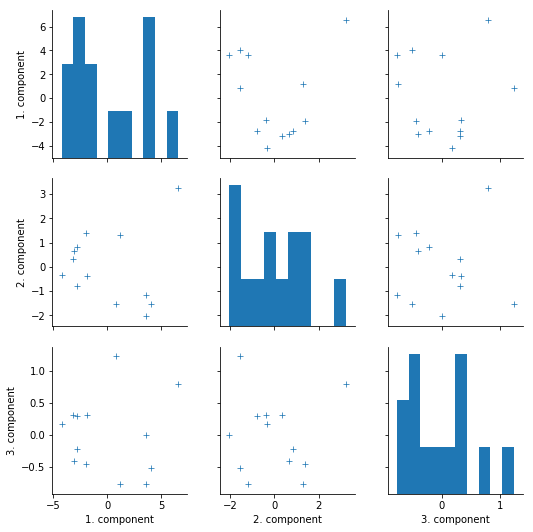

In [367]:
'''PCA of confirmed cases to cluster countries'''

pca = PCA(n_components=3)
vecs_confirmed = pca.fit_transform(confirmed_13)
vecs1_confirmed = pca.fit_transform(confirmed_13.T)
sns.pairplot(pd.DataFrame(vecs_confirmed, columns=["1. component", "2. component", "3. component"]), markers="+")
plt.savefig("confirmed_pca_countries")

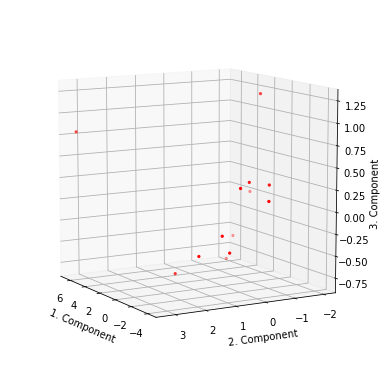

In [368]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(vecs_confirmed[:,0], vecs_confirmed[:,1], vecs_confirmed[:,2], marker=".", facecolor="r")

ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=10, azim=150)
plt.savefig("confirmed_pca_countries_3d")
plt.show()

In [290]:
for i in range(len(vecs_confirmed[0,:])):
    print(pd.DataFrame(vecs_confirmed, index=confirmed_13.index).sort_values(i, ascending=False).iloc[0:4, i])

Country/Region
Italy      6.567413
Germany    4.012525
US         3.611966
France     3.581371
Name: 0, dtype: float64
Country/Region
Italy          3.240839
Switzerland    1.376924
Spain          1.299729
Norway         0.827903
Name: 1, dtype: float64
Country/Region
United Kingdom    1.231492
Italy             0.789221
Sweden            0.319209
Austria           0.311041
Name: 2, dtype: float64


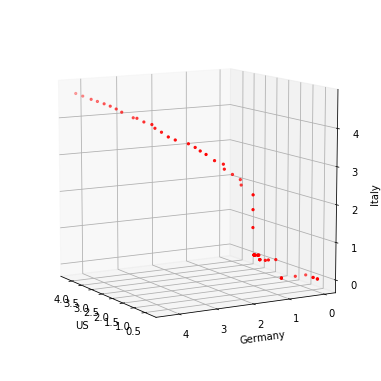

In [369]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(confirmed_13.loc["US",:], confirmed_13.loc["Germany",:], confirmed_13.loc["Italy",:], marker=".", facecolor="r")

ax.set_xlabel("US")
ax.set_ylabel("Germany")
ax.set_zlabel("Italy")
ax.view_init(elev=10, azim=150)
plt.savefig("First_Component_3_positive")
plt.show()

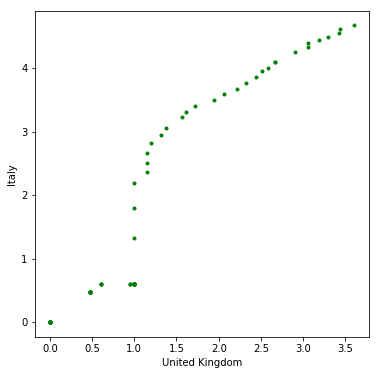

In [370]:
plt.figure(figsize=(6, 6))
plt.plot(confirmed_13.loc["United Kingdom",:], confirmed_13.loc["Italy",:], "g.")
plt.xlabel("United Kingdom")
plt.ylabel("Italy")
plt.savefig("confirmed_1_3_component")

In [291]:
for i in range(len(vecs_confirmed[0,:])):
    print(pd.DataFrame(vecs_confirmed, index=confirmed_13.index).sort_values(i, ascending=True).iloc[0:4, i])

Country/Region
Denmark       -4.214201
Austria       -3.182941
Netherlands   -3.042228
Norway        -2.772836
Name: 0, dtype: float64
Country/Region
US               -2.029360
United Kingdom   -1.545250
Germany          -1.536836
France           -1.172282
Name: 1, dtype: float64
Country/Region
France        -0.769714
Spain         -0.761995
Germany       -0.521662
Switzerland   -0.451683
Name: 2, dtype: float64


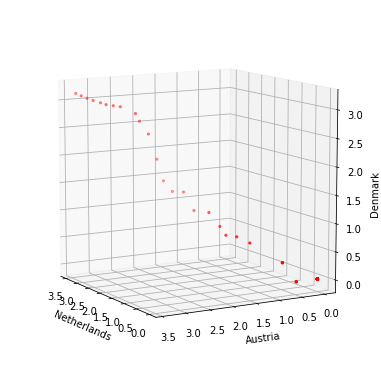

In [371]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(confirmed_13.loc["Netherlands",:], confirmed_13.loc["Austria",:], confirmed_13.loc["Denmark",:], marker=".", facecolor="r")

ax.set_xlabel("Netherlands")
ax.set_ylabel("Austria")
ax.set_zlabel("Denmark")
ax.view_init(elev=10, azim=150)
plt.savefig("confirmed_negative_first_3")
plt.show()

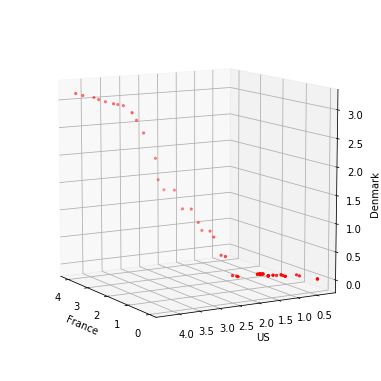

In [372]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(confirmed_13.loc["France",:], confirmed_13.loc["US",:], confirmed_13.loc["Denmark",:], marker=".", facecolor="r")

ax.set_xlabel("France")
ax.set_ylabel("US")
ax.set_zlabel("Denmark")
ax.view_init(elev=10, azim=150)
plt.savefig("Confirmed_negative_3")
plt.show()

### Second Part-------------------------------------------------------------------------

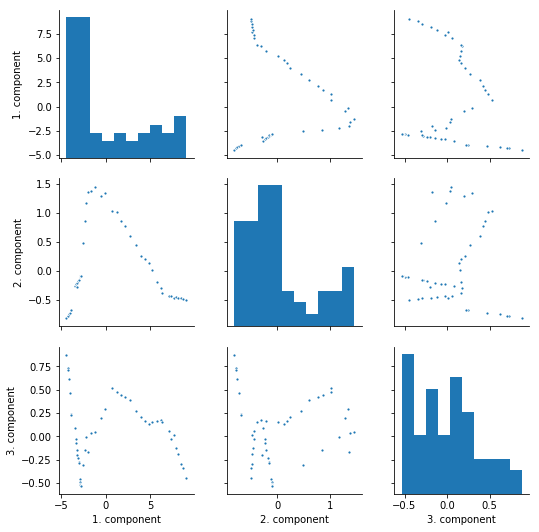

In [373]:
'''PCA of confirmed cases (Countries for each component to cluster dates)'''
sns.pairplot(pd.DataFrame(vecs1_confirmed, columns=["1. component", "2. component", "3. component"]), markers=".")
plt.savefig("confirmed_pca_time_series")

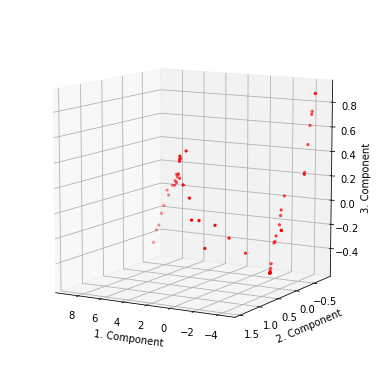

In [374]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(vecs1_confirmed[:,0], vecs1_confirmed[:,1], vecs1_confirmed[:,2], marker=".", facecolor="r")

ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=10, azim=120)
plt.savefig("Confirmed_time_series_pca_3d")
plt.show()

In [296]:
'''Show the contribution'''
'''Show the variety contributions of dates '''

for i in range(len(vecs1_confirmed[0,:])):
    print(pd.DataFrame(vecs1_confirmed, index=confirmed_13.columns).sort_values(i, ascending=False).iloc[0:4, i])

3/20/20    9.060948
3/19/20    8.762261
3/18/20    8.454819
3/17/20    8.203030
Name: 0, dtype: float64
2/26/20    1.454770
2/25/20    1.379588
2/24/20    1.358834
2/28/20    1.335896
Name: 1, dtype: float64
1/23/20    0.875637
1/22/20    0.875637
1/24/20    0.732092
1/25/20    0.708012
Name: 2, dtype: float64


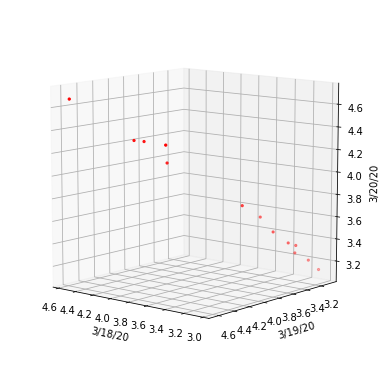

In [375]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(confirmed_13["3/18/20"], confirmed_13["3/19/20"], confirmed_13["3/20/20"], marker=".", facecolor="r")

ax.set_xlabel('3/18/20')
ax.set_ylabel("3/19/20")
ax.set_zlabel("3/20/20")
ax.view_init(elev=10, azim=130)
plt.savefig("Confirmed_countries_positive")
plt.show()

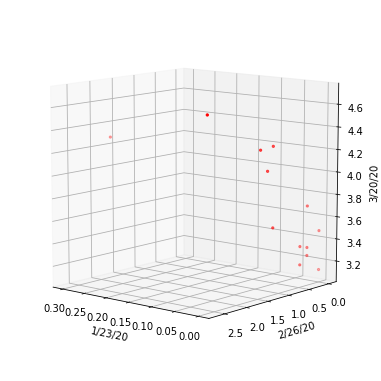

In [376]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(confirmed_13["1/23/20"], confirmed_13["2/26/20"], confirmed_13["3/20/20"], marker=".", facecolor="r")

ax.set_xlabel('1/23/20')
ax.set_ylabel("2/26/20")
ax.set_zlabel("3/20/20")
ax.view_init(elev=10, azim=130)
plt.savefig("Confirmed_time_series_positive_123")
plt.show()

In [298]:
'''Show the contribution'''
'''Show the variety contributions of dates '''
for i in range(len(vecs1_confirmed[0,:])):
    print(pd.DataFrame(vecs1_confirmed, index=confirmed_13.columns).sort_values(i, ascending=True).iloc[0:4, i])

1/22/20   -4.422894
1/23/20   -4.422894
1/24/20   -4.254755
1/25/20   -4.221665
Name: 0, dtype: float64
1/23/20   -0.811611
1/22/20   -0.811611
1/24/20   -0.782714
1/25/20   -0.778214
Name: 1, dtype: float64
2/20/20   -0.529353
2/19/20   -0.529353
2/18/20   -0.529353
2/17/20   -0.529353
Name: 2, dtype: float64


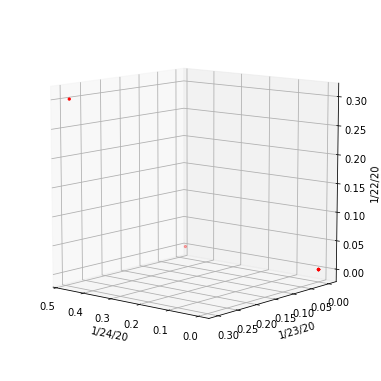

In [377]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(confirmed_13["1/24/20"], confirmed_13["1/23/20"], confirmed_13["1/22/20"], marker=".", facecolor="r")

ax.set_xlabel("1/24/20")
ax.set_ylabel("1/23/20")
ax.set_zlabel("1/22/20")
ax.view_init(elev=10, azim=130)
plt.savefig("confirmed_negative_time_series")
plt.show()

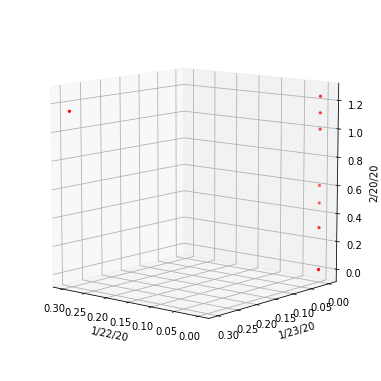

In [378]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(confirmed_13["1/22/20"], confirmed_13["1/23/20"], confirmed_13["2/20/20"], marker=".", facecolor="r")

ax.set_xlabel("1/22/20")
ax.set_ylabel("1/23/20")
ax.set_zlabel("2/20/20")
ax.view_init(elev=10, azim=130)
plt.savefig("confirmed_negative_123_time_series")
plt.show()

### It is preferable to pick the 3 variables with strongest correlations from the first component to cluster the countries.

## Part IV. PCA of the death and recovered persons

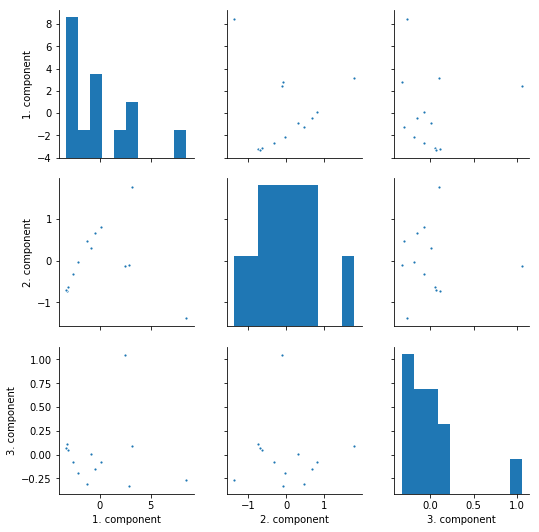

In [379]:
pca = PCA(n_components=3)
vecs_deaths = pca.fit_transform(deaths)
vecs1_deaths = pca.fit_transform(deaths.T)
sns.pairplot(pd.DataFrame(vecs_deaths, columns=["1. component", "2. component", "3. component"]), markers=".")
plt.savefig("Deaths_pca")

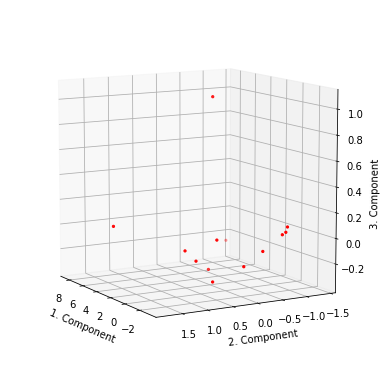

In [380]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(vecs_deaths[:,0], vecs_deaths[:,1], vecs_deaths[:,2], marker=".", facecolor="r")

ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=10, azim=150)
plt.savefig("deaths_pca_2")
plt.show()

In [330]:
for i in range(len(vecs_deaths[0,:])):
    print(pd.DataFrame(vecs_deaths, index=confirmed_13.index).sort_values(i, ascending=False).iloc[0:3, i])

Country/Region
Italy     8.483822
Spain     3.172148
France    2.837536
Name: 0, dtype: float64
Country/Region
Spain             1.778410
United Kingdom    0.805816
Netherlands       0.670731
Name: 1, dtype: float64
Country/Region
US         1.050381
Austria    0.109426
Spain      0.094812
Name: 2, dtype: float64


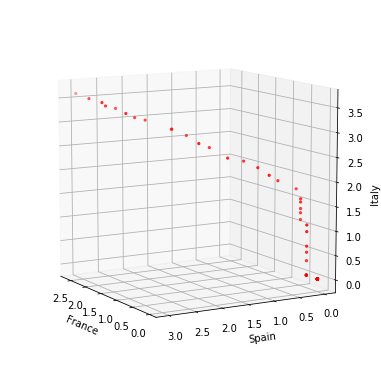

In [381]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(deaths.loc["France",:], deaths.loc["Spain",:], deaths.loc["Italy",:], marker=".", facecolor="r")

ax.set_xlabel("France")
ax.set_ylabel("Spain")
ax.set_zlabel("Italy")
ax.view_init(elev=10, azim=150)
plt.savefig("deaths_3")
plt.show()

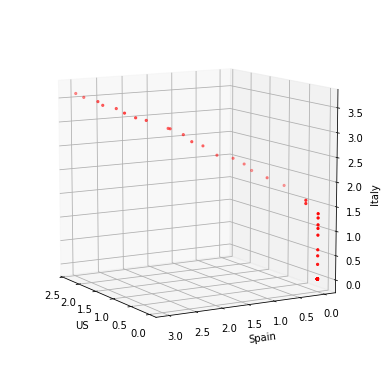

In [382]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(deaths.loc["US",:], deaths.loc["Spain",:], deaths.loc["Italy",:], marker=".", facecolor="r")

ax.set_xlabel("US")
ax.set_ylabel("Spain")
ax.set_zlabel("Italy")
ax.view_init(elev=10, azim=150)
plt.savefig("deaths_4")
plt.show()

In [334]:
for i in range(len(vecs_deaths[0,:])):
    print(pd.DataFrame(vecs_deaths, index=confirmed_13.index).sort_values(i, ascending=True).iloc[0:3, i])

Country/Region
Denmark   -3.262141
Austria   -3.213934
Norway    -3.155678
Name: 0, dtype: float64
Country/Region
Italy     -1.368906
Austria   -0.740270
Denmark   -0.699549
Name: 1, dtype: float64
Country/Region
France    -0.325356
Germany   -0.303765
Italy     -0.265842
Name: 2, dtype: float64


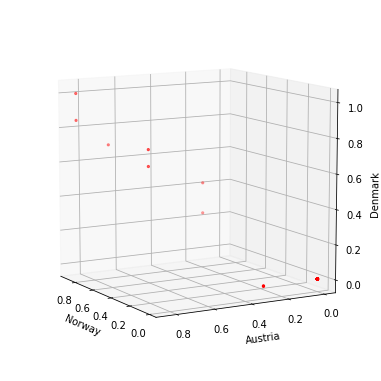

In [383]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(deaths.loc["Norway",:], deaths.loc["Austria",:], deaths.loc["Denmark",:], marker=".", facecolor="r")

ax.set_xlabel("Norway")
ax.set_ylabel("Austria")
ax.set_zlabel("Denmark")
ax.view_init(elev=10, azim=150)
plt.savefig("deaths_5")
plt.show()

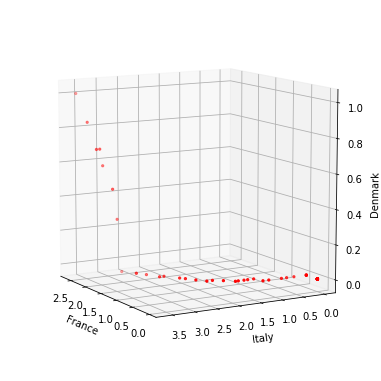

In [384]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(deaths.loc["France",:], deaths.loc["Italy",:], deaths.loc["Denmark",:], marker=".", facecolor="r")

ax.set_xlabel("France")
ax.set_ylabel("Italy")
ax.set_zlabel("Denmark")
ax.view_init(elev=10, azim=150)
plt.savefig("deaths_6")
plt.show()

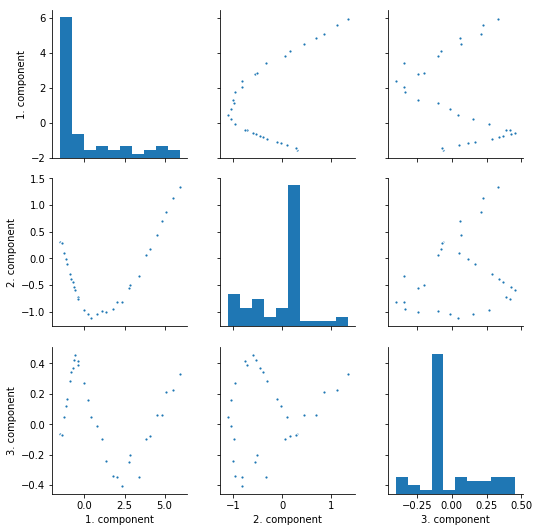

In [385]:
sns.pairplot(pd.DataFrame(vecs1_deaths, columns=["1. component", "2. component", "3. component"]), markers=".")
plt.savefig("deaths_pca_7")

In [339]:
for i in range(len(vecs1_deaths[0,:])):
    print(pd.DataFrame(vecs1_deaths, index=confirmed_13.columns).sort_values(i, ascending=False).iloc[0:3, i])

3/20/20    5.944195
3/19/20    5.550582
3/18/20    5.080270
Name: 0, dtype: float64
3/20/20    1.346231
3/19/20    1.127810
3/18/20    0.870224
Name: 1, dtype: float64
2/28/20    0.456707
2/27/20    0.422364
3/1/20     0.416226
Name: 2, dtype: float64


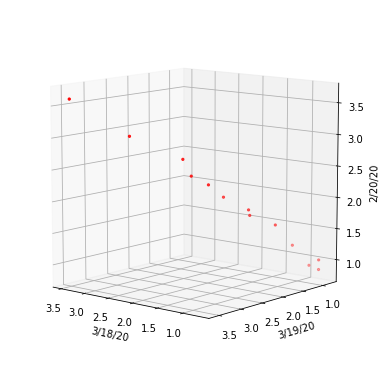

In [386]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(deaths["3/18/20"], deaths["3/19/20"], deaths["3/20/20"], marker=".", facecolor="r")

ax.set_xlabel("3/18/20")
ax.set_ylabel("3/19/20")
ax.set_zlabel("2/20/20")
ax.view_init(elev=10, azim=130)
plt.savefig("deaths_8")
plt.show()

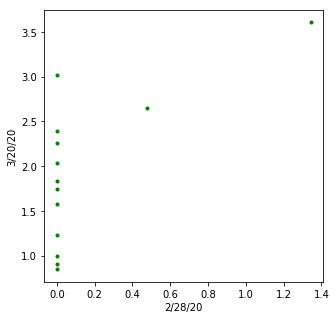

In [387]:
fig = plt.figure(figsize=(5, 5))
plt.plot(deaths["2/28/20"], deaths["3/20/20"], "g.")
plt.xlabel("2/28/20")
plt.ylabel("3/20/20")
plt.savefig("deaths_9")

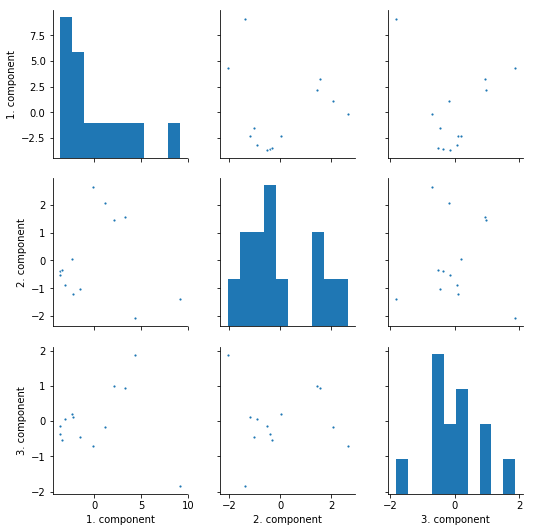

In [388]:
pca = PCA(n_components=3)
vecs_recovered = pca.fit_transform(recovered)
vecs1_recovered = pca.fit_transform(recovered.T)
sns.pairplot(pd.DataFrame(vecs_recovered, columns=["1. component", "2. component", "3. component"]), markers=".")
plt.savefig("recovered")

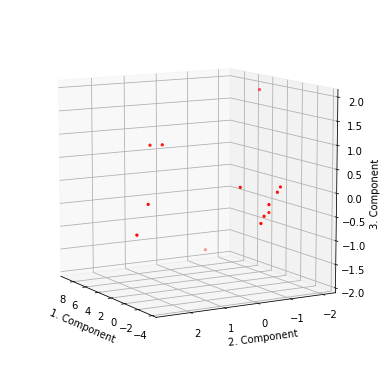

In [389]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(vecs_recovered[:,0], vecs_recovered[:,1], vecs_recovered[:,2], marker=".", facecolor="r")

ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=10, azim=150)
plt.savefig("recovered_2")
plt.show()

In [352]:
for i in range(len(vecs_recovered[0,:])):
    print(pd.DataFrame(vecs_recovered, index=confirmed_13.index).sort_values(i, ascending=False).iloc[0:3, i])

Country/Region
Italy      9.134768
Spain      4.359966
Germany    3.255353
Name: 0, dtype: float64
Country/Region
US         2.650969
France     2.060170
Germany    1.574429
Name: 1, dtype: float64
Country/Region
Spain             1.886355
United Kingdom    0.985274
Germany           0.941672
Name: 2, dtype: float64


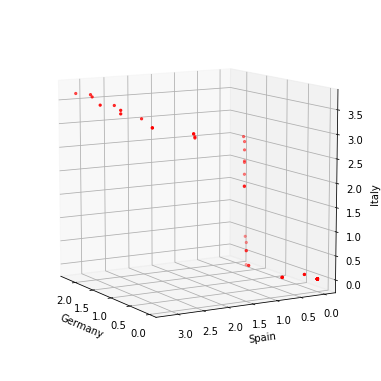

In [390]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(recovered.loc["Germany",:], recovered.loc["Spain",:], recovered.loc["Italy",:], marker=".", facecolor="r")

ax.set_xlabel("Germany")
ax.set_ylabel("Spain")
ax.set_zlabel("Italy")
ax.view_init(elev=10, azim=150)
plt.savefig("recovered_3")
plt.show()

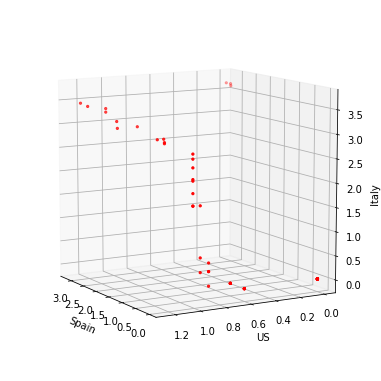

In [391]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(recovered.loc["Spain",:], recovered.loc["US",:], recovered.loc["Italy",:], marker=".", facecolor="r")

ax.set_xlabel("Spain")
ax.set_ylabel("US")
ax.set_zlabel("Italy")
ax.view_init(elev=10, azim=150)
plt.savefig("recovered_3")
plt.show()

In [355]:
for i in range(len(vecs_recovered[0,:])):
    print(pd.DataFrame(vecs_recovered, index=confirmed_13.index).sort_values(i, ascending=True).iloc[0:3, i])

Country/Region
Netherlands   -3.618707
Norway        -3.609276
Denmark       -3.431123
Name: 0, dtype: float64
Country/Region
Spain     -2.051019
Italy     -1.377524
Austria   -1.191911
Name: 1, dtype: float64
Country/Region
Italy     -1.829979
US        -0.699756
Denmark   -0.529018
Name: 2, dtype: float64


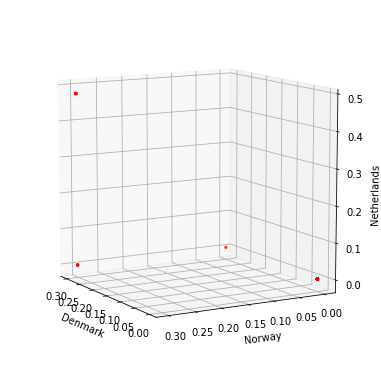

In [392]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(recovered.loc["Denmark",:], recovered.loc["Norway",:], recovered.loc["Netherlands",:], marker=".", facecolor="r")

ax.set_xlabel("Denmark")
ax.set_ylabel("Norway")
ax.set_zlabel("Netherlands")
ax.view_init(elev=10, azim=150)
plt.savefig("recovered_4")
plt.show()

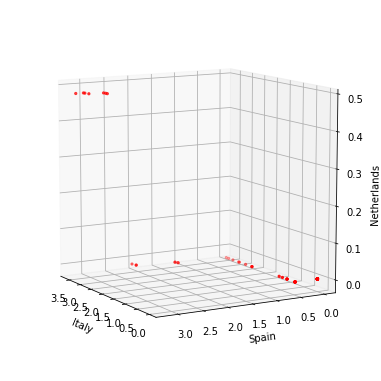

In [393]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)


ax.scatter(recovered.loc["Italy",:], recovered.loc["Spain",:], recovered.loc["Netherlands",:], marker=".", facecolor="r")

ax.set_xlabel("Italy")
ax.set_ylabel("Spain")
ax.set_zlabel("Netherlands")
ax.view_init(elev=10, azim=150)
plt.savefig("recovered_5")
plt.show()

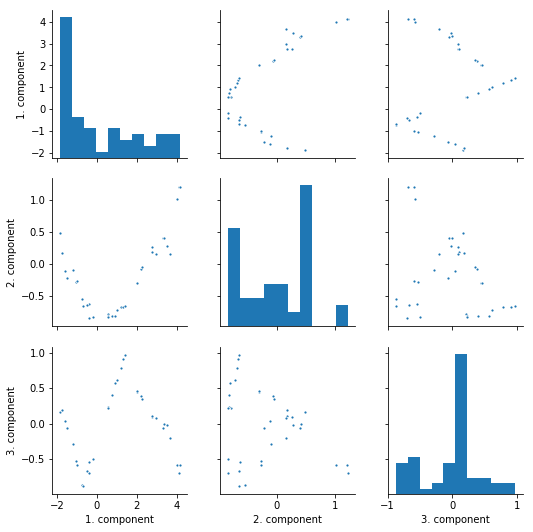

In [394]:
sns.pairplot(pd.DataFrame(vecs1_recovered, columns=["1. component", "2. component", "3. component"]), markers=".")
plt.savefig("recovered_6")

In [358]:
for i in range(len(vecs1_recovered[0,:])):
    print(pd.DataFrame(vecs1_recovered, index=confirmed_13.columns).sort_values(i, ascending=False).iloc[0:3, i])

3/20/20    4.145203
3/19/20    4.127459
3/18/20    4.005489
Name: 0, dtype: float64
3/19/20    1.208559
3/20/20    1.198591
3/18/20    1.019526
Name: 1, dtype: float64
3/6/20    0.970951
3/5/20    0.904458
3/4/20    0.784232
Name: 2, dtype: float64


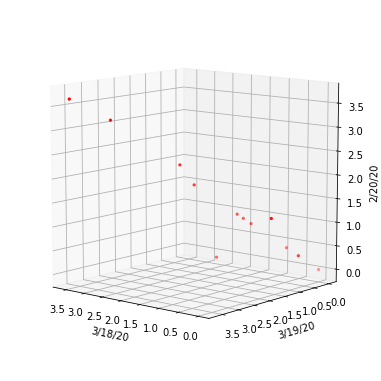

In [395]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)

ax.scatter(recovered["3/18/20"], recovered["3/19/20"], recovered["3/20/20"], marker=".", facecolor="r")

ax.set_xlabel("3/18/20")
ax.set_ylabel("3/19/20")
ax.set_zlabel("2/20/20")
ax.view_init(elev=10, azim=130)
plt.savefig("recovered_7")
plt.show()

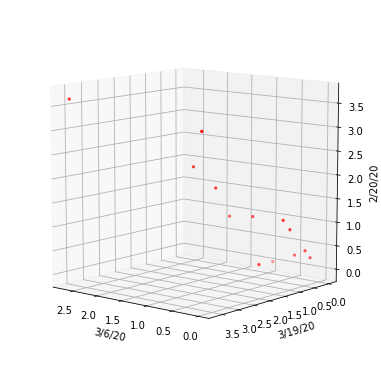

In [396]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)

ax.scatter(recovered["3/6/20"], recovered["3/19/20"], recovered["3/20/20"], marker=".", facecolor="r")

ax.set_xlabel("3/6/20")
ax.set_ylabel("3/19/20")
ax.set_zlabel("2/20/20")
ax.view_init(elev=10, azim=130)
plt.savefig("recovered_8")
plt.show()